In [1]:
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import beta

1. generate 10 samples from bernoulli distribution with theta = 0.3

In [2]:
theta = 0.3
N = 11
np.random.seed(12345)
samples = np.random.binomial(1, theta, N)
y = samples
print(samples)

[1 0 0 0 0 0 1 0 1 0 1]


In [3]:
# maximum likelihood estimation
theta_hat = np.mean(samples)
print(theta_hat)

0.36363636363636365


0.38461538461538464 0.36363636363636365


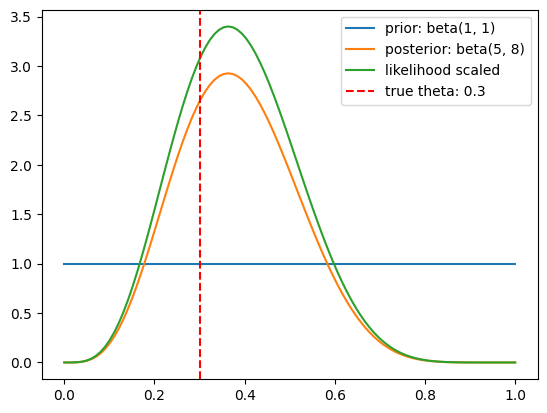

In [4]:
alpha_prior = 1
beta_prior = 1
alpha_post = alpha_prior + np.sum(y)
beta_post = beta_prior + N - np.sum(y)
theta_post = alpha_post / (alpha_post + beta_post)  # posterior mean
theta_map = (alpha_post - 1) / (alpha_post + beta_post - 2)  # posterior mode
print(theta_post, theta_map)

th = np.linspace(0, 1, 100) # theta values
likelihood = th**np.sum(y) * (1-th)**(N-np.sum(y)) # likelihood function
likelihood *= 3.4/np.max(likelihood)  # scale up for visualization

pdf_beta_prior = beta.pdf(th, alpha_prior, beta_prior)
pdf_beta_post = beta.pdf(th, alpha_post, beta_post)
plt.plot(th, pdf_beta_prior, label=f'prior: beta({alpha_prior}, {beta_prior})')
plt.plot(th, pdf_beta_post, label=f'posterior: beta({alpha_post}, {beta_post})')
plt.plot(th, likelihood, label='likelihood scaled')
plt.axvline(theta, color='red', linestyle='dashed', label=f'true theta: {theta}')
plt.legend();

0.4 0.38461538461538464


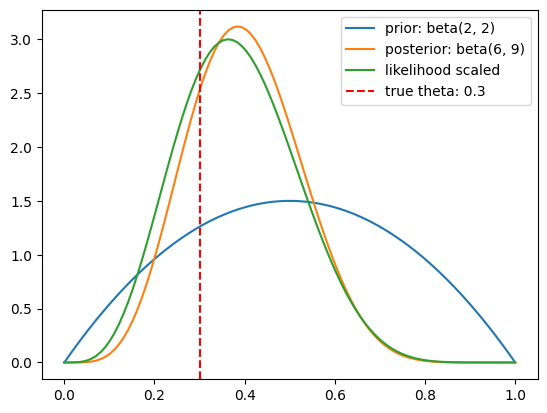

In [5]:
alpha_prior = 2
beta_prior = 2
alpha_post = alpha_prior + np.sum(y)
beta_post = beta_prior + N - np.sum(y)
theta_post = alpha_post / (alpha_post + beta_post)  # posterior mean
theta_map = (alpha_post - 1) / (alpha_post + beta_post - 2)  # posterior mode
print(theta_post, theta_map)



th = np.linspace(0, 1, 100)
likelihood = th**np.sum(y) * (1-th)**(N-np.sum(y))
likelihood *= 3/np.max(likelihood)  # scale up for visualization

pdf_beta_prior = beta.pdf(th, alpha_prior, beta_prior)
pdf_beta_post = beta.pdf(th, alpha_post, beta_post)
plt.plot(th, pdf_beta_prior, label=f'prior: beta({alpha_prior}, {beta_prior})')
plt.plot(th, pdf_beta_post, label=f'posterior: beta({alpha_post}, {beta_post})')
plt.plot(th, likelihood, label='likelihood scaled')
plt.axvline(theta, color='red', linestyle='dashed', label=f'true theta: {theta}')
plt.legend();

0.42857142857142855 0.42105263157894735


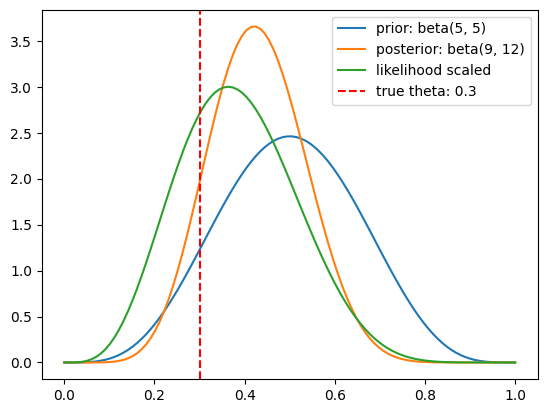

In [6]:
alpha_prior = 5
beta_prior = 5
alpha_post = alpha_prior + np.sum(y)
beta_post = beta_prior + N - np.sum(y)
theta_post = alpha_post / (alpha_post + beta_post)  # posterior mean
theta_map = (alpha_post - 1) / (alpha_post + beta_post - 2)  # posterior mode
print(theta_post, theta_map)



th = np.linspace(0, 1, 100)
likelihood = th**np.sum(y) * (1-th)**(N-np.sum(y))
likelihood *= 3/np.max(likelihood)  # scale up for visualization

pdf_beta_prior = beta.pdf(th, alpha_prior, beta_prior)
pdf_beta_post = beta.pdf(th, alpha_post, beta_post)
plt.plot(th, pdf_beta_prior, label=f'prior: beta({alpha_prior}, {beta_prior})')
plt.plot(th, pdf_beta_post, label=f'posterior: beta({alpha_post}, {beta_post})')
plt.plot(th, likelihood, label='likelihood scaled')
plt.axvline(theta, color='red', linestyle='dashed', label=f'true theta: {theta}')
plt.legend();

In [7]:
stan_code = """
data {
    int<lower=0> N;  // number of trials
    array[N] int<lower=0, upper=1> y;  // observed data
    real<lower=0> alpha;  // prior hyperparameter
    real<lower=0> beta;  // prior hyperparameter
}
parameters {
    real<lower=0, upper=1> theta;  // parameter of interest
}
model {
    theta ~ beta(alpha, beta);  // prior distribution
    y ~ bernoulli(theta);  // likelihood
}
"""
import os
dirname = 'stan_files'
os.makedirs(dirname, exist_ok=True)
stan_file = dirname + '/' +'bernoulli.stan'
stan_file = os.path.join(dirname, 'bernoulli.stan')
print(stan_file)
with open(stan_file, 'w') as f:
    f.write(stan_code)

stan_files\bernoulli.stan


import cmdstanpy
cmdstanpy.install_cmdstan()
cmdstanpy.install_cmdstan(compiler=True)  # only valid on Windows

In [8]:
from cmdstanpy import CmdStanModel
# Create a CmdStanModel object

model = CmdStanModel(stan_file=stan_file)

12:21:45 - cmdstanpy - INFO - compiling stan file E:\git\KOS6313\stan_files\bernoulli.stan to exe file E:\git\KOS6313\stan_files\bernoulli.exe
12:22:29 - cmdstanpy - INFO - compiled model executable: E:\git\KOS6313\stan_files\bernoulli.exe


In [9]:
# Define the data dictionary
data = {
    'N': N,
    'y': y,
    'alpha': alpha_prior,
    'beta': beta_prior
}

### Optimize: MAP

The python command `model.optimize(data=data)` returns the result of point estimation $\theta_{MAP}$ that maximizes $p(\theta|data)$.

The result must be the same as the mode of the posterior beta distribution:
$$
    \theta_{mode} = \frac{\hat{\alpha - 1}}{\hat{\alpha} + \hat{\beta} - 2}
$$

Most of the research has used this estimate as the optimal paramter for the posterior density $p(\theta|data)$ 

In [ ]:
map_estimate = model.optimize(data=data)
map_theta = map_estimate.stan_variable('theta')
print("MAP estimate from optimize: ", map_theta)

theta_mode = (alpha_post - 1) / (alpha_post + beta_post - 2)
print(f"Mode of beta({alpha_post}, {beta_post}): ", theta_mode)

diff = map_theta - theta_mode
print(f"Difference: {diff}  <-- this should be close to 0")

12:30:15 - cmdstanpy - INFO - Chain [1] start processing
12:30:15 - cmdstanpy - INFO - Chain [1] done processing
12:30:15 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.


MAP estimate from optimize:  0.421053
Mode of beta(9, 12):  0.42105263157894735
Difference: 3.6842105266554626e-07


### Optimize: MLE

1. The likelihood function for the data is a function of $\theta$
2. $\theta_{MLE}$ maximizes the likelihood function. In other words, the likelihood function is maximum at $\theta_MLE$.
3. When the prior density for $\theta$ is a uniform distribution $p(\theta) = Beta(a=1,b=1) = 1$, the result of `model.optimize(data=data)` is equal to $\theta_{MLE}$.
4. In general, $\theta_{MLE}$ is different from $\theta_{MAP}$. It is the same when the prior is a uniform distribution.

Our class has focused on obtaining the posterior distribution, not a single number $\theta_{MAP}$ nor $\theta_{MLE}$, because posterior distribution contains every information from the data together with our probabilistic model.

In [22]:
# Define the data dictionary
data_11 = {
    'N': N,
    'y': y,
    'alpha': 1,
    'beta': 1
}

mle_estimate = model.optimize(data=data_11)
mle_theta = mle_estimate.stan_variable('theta')
print("MLE estimate from optimize: ", mle_theta)

a_post = 1 + np.sum(y)
b_post = 1 + N - np.sum(y)
print(f"Posterior mode of beta({a_post}, {b_post}): ", (a_post - 1) / (a_post + b_post - 2))
theta_mle_by_mean = np.mean(y)


12:35:50 - cmdstanpy - INFO - Chain [1] start processing
12:35:50 - cmdstanpy - INFO - Chain [1] done processing
12:35:50 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.


MLE estimate from optimize:  0.363636
Posterior mode of beta(5, 8):  0.36363636363636365


In [11]:
# Sample from the posterior distribution by MCMC
fit = model.sample(data=data, chains=4, iter_sampling=1000, iter_warmup=500)

# Extract the samples for theta
theta_samples = fit.stan_variable('theta')

# Print the summary of the fit
print(fit.summary())

12:22:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:22:30 - cmdstanpy - INFO - CmdStan done processing.



            Mean      MCSE    StdDev       MAD         5%        50%  \
lp__  -14.853800  0.018336  0.738700  0.316387 -16.342600 -14.572500   
theta   0.435736  0.003058  0.105727  0.107821   0.264818   0.432737   

             95%  ESS_bulk  ESS_tail    R_hat  
lp__  -14.342900   1721.77   2175.52  1.00214  
theta   0.612523   1220.79   1701.66  1.00244  


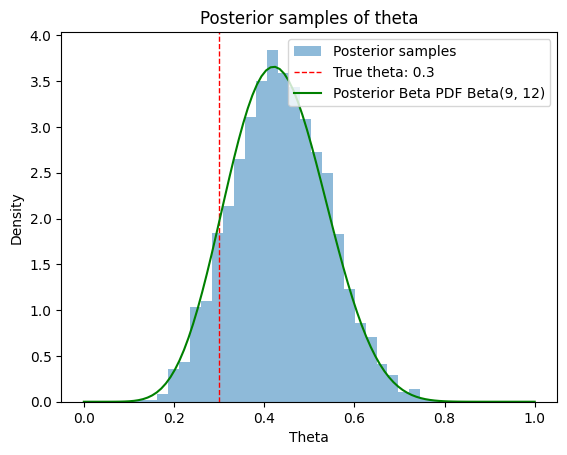

In [12]:
# Plot the histogram of the samples
plt.hist(theta_samples, bins=30, density=True, alpha=0.5, label='Posterior samples')
plt.axvline(theta, color='red', linestyle='dashed', linewidth=1, label=f'True theta: {theta}')
plt.plot(th, pdf_beta_post, label=f'Posterior Beta PDF Beta({alpha_post}, {beta_post})', color='green')
plt.title('Posterior samples of theta')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.legend()
plt.show()

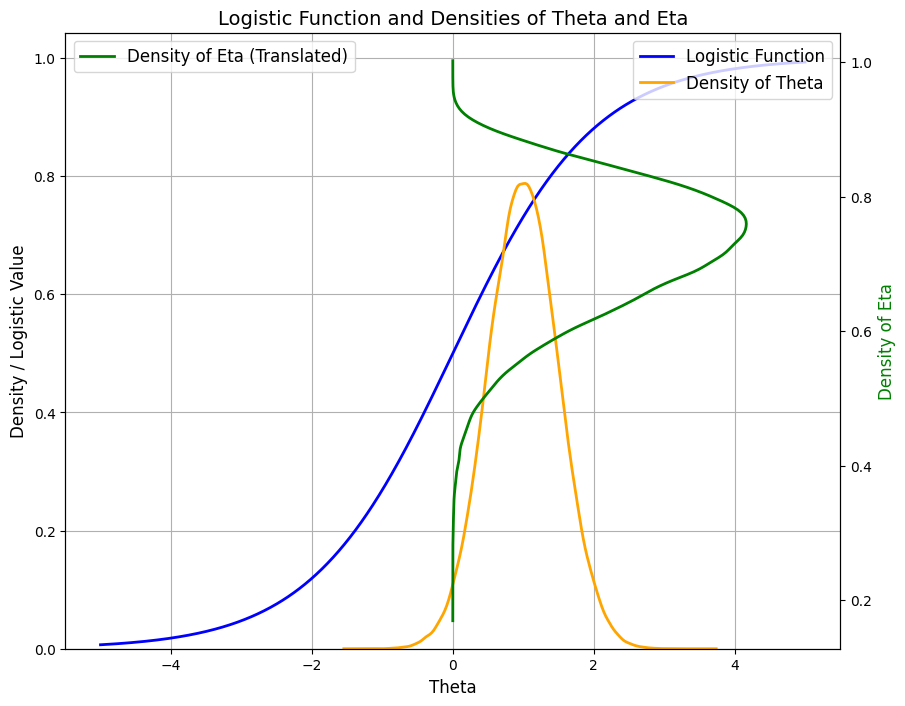

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Draw 1000 samples from a standard normal distribution
theta_samples_standard_normal = np.random.normal(1, .5, 100000)

# Define the logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of theta values for plotting
theta_range = np.linspace(-5, 5, 1000)

# Compute eta values using the logistic function
eta_values = logistic(theta_range)

# Transform theta to eta for density plot
eta_samples_standard_normal = logistic(theta_samples_standard_normal)

# Translate eta density by -5
eta_samples_translated = eta_samples_standard_normal

# Create a single figure
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot the logistic function and density of theta on the primary x-axis
ax1.plot(theta_range, eta_values, label='Logistic Function', color='blue', linewidth=2)
sns.kdeplot(theta_samples_standard_normal, label='Density of Theta', color='orange', linewidth=2, ax=ax1)

# Add labels and grid for the primary axis
ax1.set_title('Logistic Function and Densities of Theta and Eta', fontsize=14)
ax1.set_xlabel('Theta', fontsize=12)
ax1.set_ylabel('Density / Logistic Value', fontsize=12)
ax1.grid()
ax1.legend(loc='upper right', fontsize=12)

# Create a secondary y-axis for the density of eta
ax2 = ax1.twinx()
sns.kdeplot(y=eta_samples_translated, label='Density of Eta (Translated)', color='green', linewidth=2, ax=ax2)

# Add labels and legend for the secondary axis
ax2.set_ylabel('Density of Eta', fontsize=12, color='green')
ax2.legend(loc='upper left', fontsize=12)

plt.show()


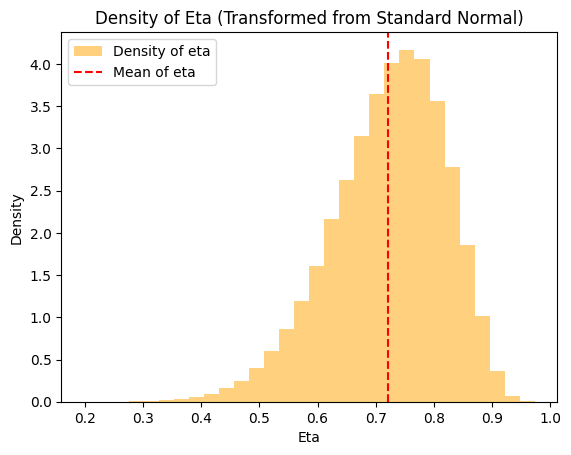

In [14]:
# Transform theta to eta using the logistic function
eta_samples_standard_normal = 1 / (1 + np.exp(-theta_samples_standard_normal))

# Plot the density of eta
plt.hist(eta_samples_standard_normal, bins=30, density=True, alpha=0.5, color='orange', label='Density of eta')
plt.axvline(np.mean(eta_samples_standard_normal), color='red', linestyle='dashed', label='Mean of eta')
plt.xlabel('Eta')
plt.ylabel('Density')
plt.title('Density of Eta (Transformed from Standard Normal)')
plt.legend()
plt.show()

12:22:34 - cmdstanpy - INFO - compiling stan file E:\git\KOS6313\stan_files\logistic_model.stan to exe file E:\git\KOS6313\stan_files\logistic_model.exe
12:22:53 - cmdstanpy - INFO - compiled model executable: E:\git\KOS6313\stan_files\logistic_model.exe
12:22:54 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:22:54 - cmdstanpy - INFO - CmdStan done processing.



           Mean      MCSE    StdDev       MAD        5%       50%       95%  \
lp__  -7.818500  0.018334  0.698265  0.305519 -9.157150 -7.546030 -7.325290   
theta -0.440858  0.013653  0.528059  0.519839 -1.324250 -0.434954  0.417969   
eta    0.398169  0.003042  0.118720  0.122527  0.210112  0.392944  0.602997   

       ESS_bulk  ESS_tail    R_hat  
lp__    1656.43   1970.52  1.00069  
theta   1522.89   2047.56  1.00139  
eta     1522.89   2047.56  1.00139  


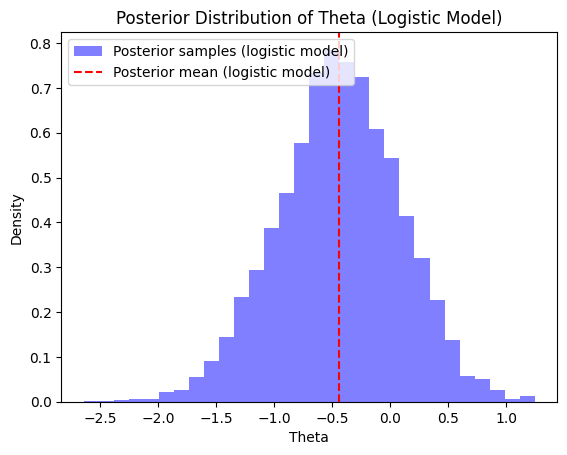

In [ ]:
stan_code = """
functions {
    real logistic_function(real x) {
        return 1 / (1 + exp(-x));
    }
}
data {
    int<lower=0> N;  // number of trials
    array[N] int<lower=0, upper=1> y;  // observed data
    real mm;  // mean of normal prior for theta
    real ss;  // standard deviation of normal prior for theta
}
parameters {
    real theta;  // parameter of interest
}
transformed parameters {
    real eta = logistic_function(theta);  // transformed parameter
}
model {
    theta ~ normal(mm, ss);  // prior for theta
    y ~ bernoulli(eta);  // likelihood
}
"""

# Save the new Stan code to a file
stan_file_logistic = os.path.join(dirname, 'logistic_model.stan')
with open(stan_file_logistic, 'w') as f:
    f.write(stan_code)

# Create a CmdStanModel object for the new Stan model
logistic_model = CmdStanModel(stan_file=stan_file_logistic)

# Define the data dictionary for the logistic model
data_logistic = {
    'N': N,
    'y': y,
    'mm': 0,  # mean of normal prior
    'ss': 1   # standard deviation of normal prior
}

# Perform MCMC sampling
fit_logistic = logistic_model.sample(data=data_logistic, chains=4, iter_sampling=1000, iter_warmup=500)

# Extract the samples for theta
theta_samples_logistic = fit_logistic.stan_variable('theta')

# Print the summary of the fit
print(fit_logistic.summary())

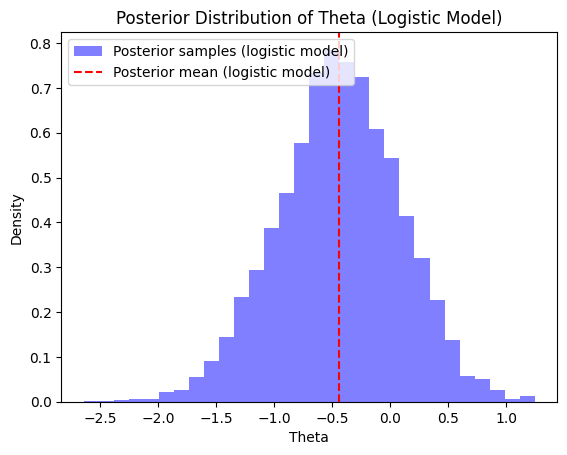

Text(0, 0.5, 'Density')

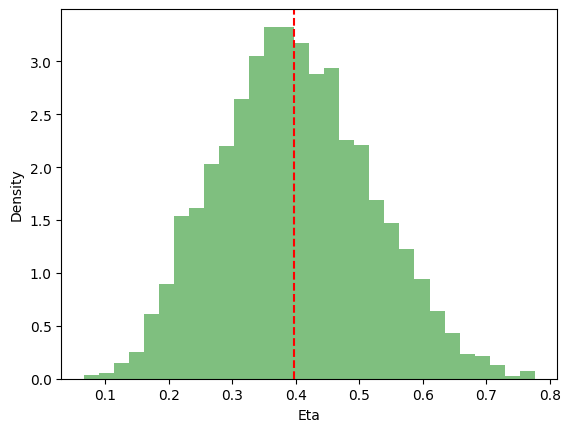

In [23]:
# Plot the posterior distribution of theta
plt.hist(theta_samples_logistic, bins=30, density=True, alpha=0.5, color='blue', label='Posterior samples (logistic model)')
plt.axvline(np.mean(theta_samples_logistic), color='red', linestyle='dashed', label='Posterior mean (logistic model)')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Posterior Distribution of Theta (Logistic Model)')
plt.legend()
plt.show()
# Plot the posterior distribution of eta
plt.hist(1 / (1 + np.exp(-theta_samples_logistic)), bins=30, density=True, alpha=0.5, color='green', label='Posterior samples of eta')
plt.axvline(np.mean(1 / (1 + np.exp(-theta_samples_logistic))), color='red', linestyle='dashed', label='Posterior mean of eta')
plt.xlabel('Eta')
plt.ylabel('Density')

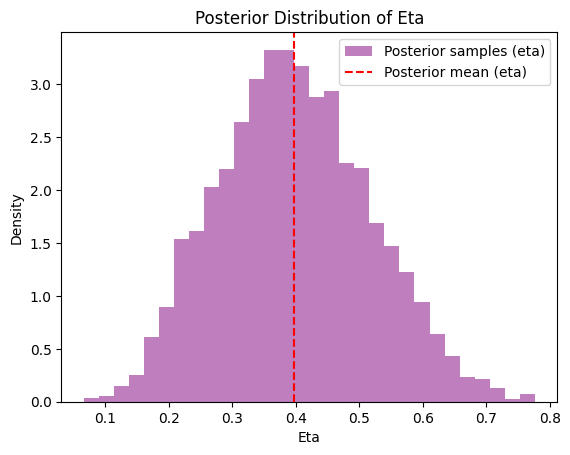

In [16]:
# Transform theta_samples_logistic to eta
eta_samples = 1 / (1 + np.exp(-theta_samples_logistic))

# Plot the density of eta
plt.hist(eta_samples, bins=30, density=True, alpha=0.5, color='purple', label='Posterior samples (eta)')
plt.axvline(np.mean(eta_samples), color='red', linestyle='dashed', label='Posterior mean (eta)')
plt.xlabel('Eta')
plt.ylabel('Density')
plt.title('Posterior Distribution of Eta')
plt.legend()
plt.show()

### Credible Interval

Read the Wikipedia page about the smallest credible interval: https://en.wikipedia.org/wiki/Credible_interval

- The code below shows how to draw a high posterior (or probability) density interval (credible interval) using the python package `arviz`. Don't forget to install it (`pip install arviz`).

* Why do we need to have the narrowest interval?

    GitHub Copilot

    - We want the narrowest interval (the HPD interval) because it gives the most precise summary of where the parameter is most likely to be, according to the posterior distribution.

    - The HPD interval always contains the regions of highest probability density.
    For a given probability mass (e.g., 94%), the narrowest interval excludes low-probability regions and focuses on the values most supported by the data and model.
    This makes the interval more informative and useful, especially when the posterior is skewed or multimodal.
    In summary, the narrowest interval provides the tightest, most credible range for the parameter, reflecting our best knowledge from the data.

94% HPD credible interval: [-1.3819, 0.5724]


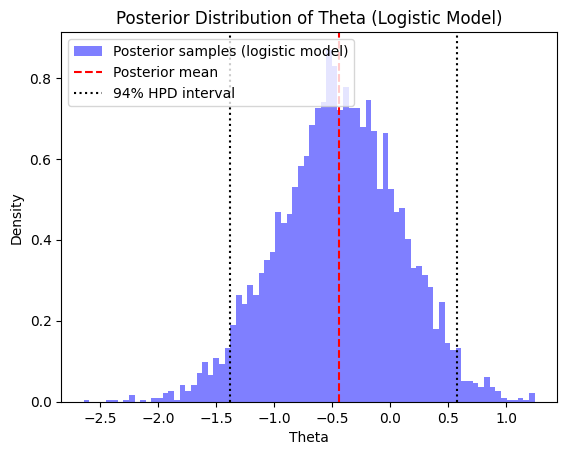

In [28]:
import arviz as az

# Compute the 94% HPD (smallest credible interval)
hpd_interval = az.hdi(theta_samples_logistic, hdi_prob=0.94)
print(f"94% HPD credible interval: [{hpd_interval[0]:.4f}, {hpd_interval[1]:.4f}]")

# Plot with HPD interval
plt.hist(theta_samples_logistic, bins=80, density=True, alpha=0.5, color='blue', label='Posterior samples (logistic model)')
plt.axvline(np.mean(theta_samples_logistic), color='red', linestyle='dashed', label='Posterior mean')
plt.axvline(hpd_interval[0], color='black', linestyle='dotted', label='94% HPD interval')
plt.axvline(hpd_interval[1], color='black', linestyle='dotted')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Posterior Distribution of Theta (Logistic Model)')
plt.legend()
plt.show()

In [32]:
print("Number of samples outside the HPD interval: ",
        "left side: ", sum(theta_samples_logistic <= hpd_interval[0]), 
        "right side: ", sum(theta_samples_logistic >= hpd_interval[1]) 
)
# Check if the true value of theta is within the HPD interval
print(f"True theta: {theta}")

Number of samples outside the HPD interval:  left side:  150 right side:  91
True theta: 0.3
